### Student Information
Name: 許人中

Student ID: M133010052

GitHub ID: JamesHsu1221

Kaggle name: Hsu, Jen-Chung

Kaggle private scoreboard snapshot:
![pic0.png](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

_____________________________

# Kaggle Competition Report

## Loading data and Organize information

In [1]:
import pandas as pd

origin_df = pd.read_json('data.json', lines=True)
identification = pd.read_csv('data_identification.csv')
emotion = pd.read_csv('emotion.csv')

print(origin_df.head())

   _score          _index                                            _source  \
0     391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1     433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2     232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3     376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4     989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

            _crawldate   _type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 23:53:05  tweets  
4  2016-01-08 17:18:59  tweets  


Extract feature 'tweet_id' and 'text' from .json

In [2]:
df = origin_df['_source'].apply(lambda x: pd.Series({'tweet_id': x['tweet']['tweet_id'], 'text': x['tweet']['text']}))

print(df.head())

   tweet_id                                               text
0  0x376b20  People who post "add me on #Snapchat" must be ...
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...
2  0x28b412  Confident of your obedience, I write to you, k...
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>
4  0x2de201  "Trust is not the same as faith. A friend is s...


Split training data and test data

In [3]:
merge_with_identification = pd.merge(df, identification, on='tweet_id', how='left')

train_df = merge_with_identification[merge_with_identification['identification'] == 'train']
test_df = merge_with_identification[merge_with_identification['identification'] == 'test']

train_df = train_df.drop(columns=['identification'])
test_df = test_df.drop(columns=['identification'])

print(train_df.head())
print(test_df.head())

   tweet_id                                               text
0  0x376b20  People who post "add me on #Snapchat" must be ...
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...
3  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>
5  0x1d755c  @RISKshow @TheKevinAllison Thx for the BEST TI...
6  0x2c91a8       Still waiting on those supplies Liscus. <LH>
    tweet_id                                               text
2   0x28b412  Confident of your obedience, I write to you, k...
4   0x2de201  "Trust is not the same as faith. A friend is s...
9   0x218443  When do you have enough ? When are you satisfi...
30  0x2939d5  God woke you up, now chase the day #GodsPlan #...
33  0x26289a  In these tough times, who do YOU turn to as yo...


Add feature 'emotion' to train_df

In [4]:
train_df = pd.merge(train_df, emotion, on='tweet_id', how='left')

print(train_df.head())

   tweet_id                                               text       emotion
0  0x376b20  People who post "add me on #Snapchat" must be ...  anticipation
1  0x2d5350  @brianklaas As we see, Trump is dangerous to #...       sadness
2  0x1cd5b0                Now ISSA is stalking Tasha 😂😂😂 <LH>          fear
3  0x1d755c  @RISKshow @TheKevinAllison Thx for the BEST TI...           joy
4  0x2c91a8       Still waiting on those supplies Liscus. <LH>  anticipation


Save the dataframe to .csv (Can be read directly afterwards)

In [5]:
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("saved as csv!")

saved as csv!


Save the dataframe to .json (Cause .csv can't reserve the emoji. So if we want use emoji, we need load the json file.)

In [6]:
train_df.to_json('train_data.json', orient='records', lines=False, indent=4)
test_df.to_json('test_data.json', orient='records', lines=False, indent=4)

print("saved as JSON!")

saved as JSON!


_________________________

## After we save the file what we processing, we can directly load it.

csv file (without emoji)

In [1]:
import pandas as pd

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

JSON file (with emoji)

In [2]:
import pandas as pd

train_df = pd.read_json('train_data.json')
test_df = pd.read_json('test_data.json')

Remove punctuation marks and Convert it. (Optional, if we don't want use emoji.)

In [3]:
import re

def preprocess_text(text):
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation marks
    text = text.lower().strip()         # Convert all to lowercase and remove spaces
    return text
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

print(train_df.head())

   tweet_id                                               text       emotion
0  0x376b20  people who post add me on snapchat must be deh...  anticipation
1  0x2d5350  brianklaas as we see trump is dangerous to fre...       sadness
2  0x1cd5b0                     now issa is stalking tasha  lh          fear
3  0x1d755c  riskshow thekevinallison thx for the best time...           joy
4  0x2c91a8          still waiting on those supplies liscus lh  anticipation


_____________

## Data analysis

### Observe the class distribution

In [4]:
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

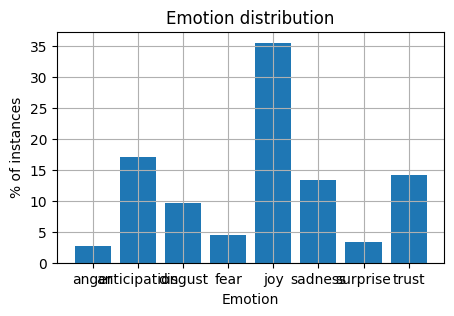

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## Data Preprocessing 

### Remove stopwords

In [ ]:
# Only need execution one times

import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Win\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

train_df['text'] = train_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_stopwords)

print(train_df['text'].head())
print(test_df['text'].head())

0    people post add snapchat must dehydrated cuz m...
1    brianklaas see trump dangerous freepress aroun...
2                               issa stalking tasha lh
3    riskshow thekevinallison thx best time tonight...
4                     still waiting supplies liscus lh
Name: text, dtype: object
0    confident obedience write knowing even ask phi...
1    trust faith friend someone trust putting faith...
2    enough satisfied goal really money materialism...
3              god woke chase day godsplan godswork lh
4                      tough times turn symbol hope lh
Name: text, dtype: object


### Sampling

From the histogram, we can observe that many data's emotion is "joy". But the data is very scarce in "surprise".  

It will cause the prediction to be very biased towards "joy". So I use sampling to balance the emotion distribution.

In [11]:
import pandas as pd

sample_df = train_df.groupby('emotion', group_keys=False).apply(lambda x: x.sample(n=39000, random_state=1))
sample_df = sample_df.sample(frac=1, random_state=1).reset_index(drop=True)
print(sample_df)

C:\Users\Win\AppData\Local\Temp\ipykernel_16900\4240658233.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = train_df.groupby('emotion', group_keys=False).apply(lambda x: x.sample(n=39000, random_state=1))


        tweet_id                                               text  \
0       0x289812  im scott monie got sauce bitch lh 10pm love sc...   
1       0x2b7a19                  shriramdusane lh moment lh handle   
2       0x32d1d9  paonthemic ericnordokfan aarongleeman ill call...   
3       0x359fe7                                broke seal early lh   
4       0x2ad04a  put eyeshadow primer face washed spin brushed ...   
...          ...                                                ...   
311995  0x272dc9  woke lh stans mentions ksdhbjdshj im sorry spe...   
311996  0x38a2a3        registered senior ordination exams lh pcusa   
311997  0x23c0c3  74 moments life life lh lh lh lh lh lh lh augu...   
311998  0x2b79f1             ianfarrow getup surprised lets get get   
311999  0x2326f6  lh cancermen prostatecancer think would like p...   

             emotion  
0           surprise  
1            sadness  
2       anticipation  
3            sadness  
4            disgust  
...      

In [12]:
sample_df.groupby(['emotion']).count()['text']

emotion
anger           39000
anticipation    39000
disgust         39000
fear            39000
joy             39000
sadness         39000
surprise        39000
trust           39000
Name: text, dtype: int64

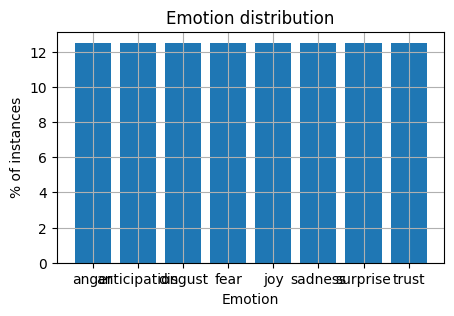

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = sample_df['emotion'].unique()
post_total = len(sample_df)
df1 = sample_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

### Split

Use split to generate training data and test data. Can use to verify the model accuracy and generate the classification report.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample_df, sample_df['emotion'], test_size=0.2, random_state=4, stratify=sample_df['emotion'])

print(X_train.shape)
print(X_test.shape)

(249600, 3)
(62400, 3)


### Encode

Because XGBoost and neural networks do not accept non-numeric classes, we must first convert the classes into numbers in order to generate a prediction model.

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(label_encoder.classes_)
print(y_train[0:8])
print(y_train_encoded[0:8])

['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']
28685             fear
283336             joy
155808         sadness
100279    anticipation
76869     anticipation
225169        surprise
108271            fear
144289         sadness
Name: emotion, dtype: object
[3 4 5 1 1 6 3 5]


__________

Below this part, I used kaggle to training. So it doesn't have the execute result.

## Feature Engineering

I used three different feature extraction methods and matched them with different models for training.  

1. Bag of Words
2. TF-IDF
3. W2V

### 1. Bag of Words

I try to used many different numbers of features for training.  
The purpose is to see if there will be over fitting problems if the quantity is too large.  

The conclusion is that basically no matter what model, more features will not lead to serious overfitting, but will greatly increase the training time, and the accuracy will not be much different.  
(I use 3000 features and 10000 features in XGBoost, the final accuracy difference was only 0.01)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

number_feature = 10000

BOW = CountVectorizer(max_features = number_feature, tokenizer=nltk.word_tokenize) 
BOW.fit(sample_df['text'])

X_train = BOW.transform(X_train['text'])
X_test = BOW.transform(X_test['text'])

We can check the feature names.

In [ ]:
BOW.get_feature_names_out()[100:110]

### 2. TF-IDF

I compared the results of BOW and TFIDF (features = 1000) with Random Forest and XGBoost.  
In the end, BOW has a higher accuracy.

I think it is because TF-IDF is prone to generating sparse matrices and may reduce important words ("good", "bad", "happy", etc.) to their importance.  
The features generated by BOW are more intuitive and will not reduce the importance of common words.  

Random Forest and XGBoost are not good at handling highly sparse matrices, so I think this is the reason why BOW is better than TF-IDF. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

TFIDF.fit(sample_df['text'])

X_train = TFIDF.transform(X_train['text'])
X_test = TFIDF.transform(X_test['text'])

### 3. W2V

I try to use generate by itself and "word2vec-google-news-300".

1. training by itself

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['tweet_id', 'text', 'text_tokenized']].head()

In [ ]:
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

generate W2V model

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 500
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

get the average vector

In [ ]:
import torch

from nltk.tokenize import word_tokenize

def text_to_avg_vector(text, model, vector_dim):
    words = word_tokenize(text.lower())
    vectors = []

    for word in words:
        if word in model.wv:
            vectors.append(torch.tensor(model.wv[word]).cuda())
    
    if vectors:
        avg_vector = torch.mean(torch.stack(vectors), dim=0)
        return avg_vector.cpu().numpy()
    else:
        return np.zeros(vector_dim)

sample_df['avg_vector'] = sample_df['text'].apply(lambda x: text_to_avg_vector(x, word2vec_model, vector_dim))

print(sample_df.head())

(use sampling between get average vector and flatten)

In [ ]:
# flatten 'avg_vector'

import pandas as pd

vector_df = pd.DataFrame(X_train['avg_vector'].tolist(), index=X_train.index)

X_train = pd.concat([X_train, vector_df], axis=1)

X_train = X_train.drop(columns=['tweet_id','text','emotion','avg_vector','text_tokenized'])

print(X_train.head())
print(X_train.shape)

2. use "word2vec-google-news-300".

In [ ]:
import torch
import nltk
import gensim.downloader as api
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
W2V_300_model = api.load("word2vec-google-news-300")
print('Model loaded successful')

def text_to_vector_with_gpu(text, model):
    if not isinstance(text, str):
        return None
    words = nltk.word_tokenize(text)
    vectors = []
    for word in words:
        if word in model:
            vector = torch.tensor(model[word]).cuda()
            vectors.append(vector)
    if vectors:
        return torch.mean(torch.stack(vectors), dim=0).cpu().numpy()
    else:
        return None

sample_df['W2V'] = sample_df['text'].apply(lambda x: text_to_vector_with_gpu(x, W2V_300_model))

(use sampling between get average vector and flatten)

In [ ]:
# flatten 'avg_vector'

import pandas as pd

w2v_df = pd.DataFrame(X_train['W2V'].tolist(), index=X_train.index)

X_train = pd.concat([X_train, w2v_df], axis=1)

X_train = X_train.drop(columns=['tweet_id','text','emotion','W2V'])

print(X_train.head())

______________

## Training Model

I used three different models for training.  

1. Decision Tree
2. Random Forest
3. Neural Network
4. XGBoost

### 1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_leaf_nodes=1000, random_state=1)

DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

print ('All predict success!')

### 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=500, max_depth=100, min_samples_split=2, random_state=1)

RF_model = RF_model.fit(X_train, y_train)

y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

print ('All predict success!')

### 3. Neural Network

In [ ]:
from sklearn.preprocessing import LabelEncoder
import keras

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 1000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=256)(X)  # 256
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger

# training setting
epochs = 25
batch_size = 256

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_test, y_test))
print('training finish')

pred_result = model.predict(X_test, batch_size=128)
print ('All predict success!')

### 4. XGBoost

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=350,
    learning_rate=0.1,
    max_depth=35,
    objective='multi:softprob',
    num_class=8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',
    device="cuda")  # use GPU

XGB_model=XGB_model.fit(X_train, y_train_encoded)
print ('training finish!')

y_train_pred = XGB_model.predict(X_train)
y_test_pred = XGB_model.predict(X_test)
print ('All predict success!')

_____________________

## Result verification

### accuracy and report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

### confusion matrix

In [ ]:
# Funciton for visualizing confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']

plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

__________________

## Experiment

### **1. Emotion work or not** 

1. sampling, BOW(feature = 1000), Decision Tree (max leaf nodes=1000)
2. sampling, BOW(feature = 1000), Decision Tree (max leaf nodes=1000), with emoji

Accuracy :  
1. 0.26531  
2. 0.30125

**Keeping emoji will improve accuracy.**

### **2. Randomforest or XGBoost**

1. sampling, BOW(feature=3000), randomforest(n_estimators=500, max_depth=100)
2. sampling, BOW(feature=1500), XGBOOST(n_estimators=250, max_depth=50)

Accuracy :  
1. 0.33584
2. 0.34594

Although the parameters are different, the parameters of Random Forest are higher than XGBoost, but the accuracy is lower, **so I think XGBoost is better.**

### **3. W2V or BOW**

1. sampling, W2V("word2vec-google-news-300"), XGBoost(n_estimators=250, max_depth=50)
2. sampling, BOW(feature = 3000), XGBOOST(n_estimators=250, max_depth=50)

Accuracy :  
1. 0.32627  
2. 0.35805

### **4. Number of Features**

1. sampling, BOW(feature = 3000), XGBOOST  
2. sampling, BOW(feature = 5000), XGBOOST  
3. sampling, BOW(feature = 10000), XGBOOST

Accuracy :  
1. 0.35805  
2. 0.36365  
3. 0.36797

Increasing the number of features can improve the accuracy, but the improvement effect will be increasingly limited and the training time will be increased.

### **5. Sampling or not**

1. sampling, use stopwords, BOW(feature = 10000), XGBOOST
2. use stopwords, BOW(feature = 10000), XGBOOST

Accuracy :  
1. 0.36416
2. 0.42963

Using sampling can significantly reduce the amount of data, balance categories, and reduce training time. **However, the accuracy rate is still higher when using complete data.**

I guess it’s because the amount of data is really different.  
(14455563 vs 312000)

### **6. use stopwords or not**

1. use stopwords, BOW(feature = 10000), XGBOOST
2. BOW(feature = 10000), XGBOOST

Accuracy :  
1. 0.42963
2. 0.43519

**Using stopwords may result in the deletion of some reference words.**

It may be that the stopwords are useless because there are enough features. If we reduce the number of features, the results may be different.

___________

## The most accurate version

import

In [ ]:
import json
import pandas as pd

train_df = pd.read_json('/kaggle/input/basic-dataset/train_data.json')
test_df = pd.read_json('/kaggle/input/basic-dataset/test_data.json')

print(train_df['text'].head())
print(test_df['text'].head())

split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df, train_df['emotion'], test_size=0.2, random_state=4, stratify=train_df['emotion'])
print(train_df.shape)
print(X_train.shape)

BOW (feature = 10000)

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

BOW_10000 = CountVectorizer(max_features=10000, tokenizer=nltk.word_tokenize) 
BOW_10000.fit(train_df['text'])

X_train = BOW_10000.transform(X_train['text'])
X_test = BOW_10000.transform(X_test['text'])

encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(label_encoder.classes_)
print(y_train_encoded)

XGBoost

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=350,
    learning_rate=0.1,
    max_depth=35,
    objective='multi:softprob',
    num_class=8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',
    device="cuda")

XGB_model=XGB_model.fit(X_train, y_train_encoded)
print ('training finish!')

y_train_pred = XGB_model.predict(X_train)
print ('train data predict success!')
y_test_pred = XGB_model.predict(X_test)
print ('test data predict success!')

decode

In [ ]:
y_train_pred = label_encoder.inverse_transform(y_train_pred)
print(y_train_pred)
y_test_pred = label_encoder.inverse_transform(y_test_pred)
print(y_test_pred)

see the accuracy and report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

training real test_df

In [ ]:
predict_data = BOW_10000.transform(test_df['text'])

predict_result_encoder = XGB_model.predict(predict_data)
predict_result_encoder[:5]

predict_result = label_encoder.inverse_transform(predict_result_encoder)
print(predict_result)

generate submission.csv 

In [ ]:
submission = pd.DataFrame({'id': test_df['tweet_id'], 'emotion': predict_result})
submission.to_csv('submission.csv', index=False)

### Result

Public  Score : 0.43519  
Private Score : 0.42179